# Getting started with forecasting with pretrained ACED-HMM

This notebook walks through making accurate forecasts using a pretrained ACED-HMM model that was fitted on census counts from Massachusetts between Nov. 11 and Jan. 11.

The users may also try out our other pretrained models by modifying the filepaths in each cell accordingly:
1. US/UT-20201111-20210111-20210211\

# 1. Visualize prior and pretrained posterior distributions over ACED-HMM's parameters

In [8]:
from aced_hmm.visualize_forecasts import plot_params

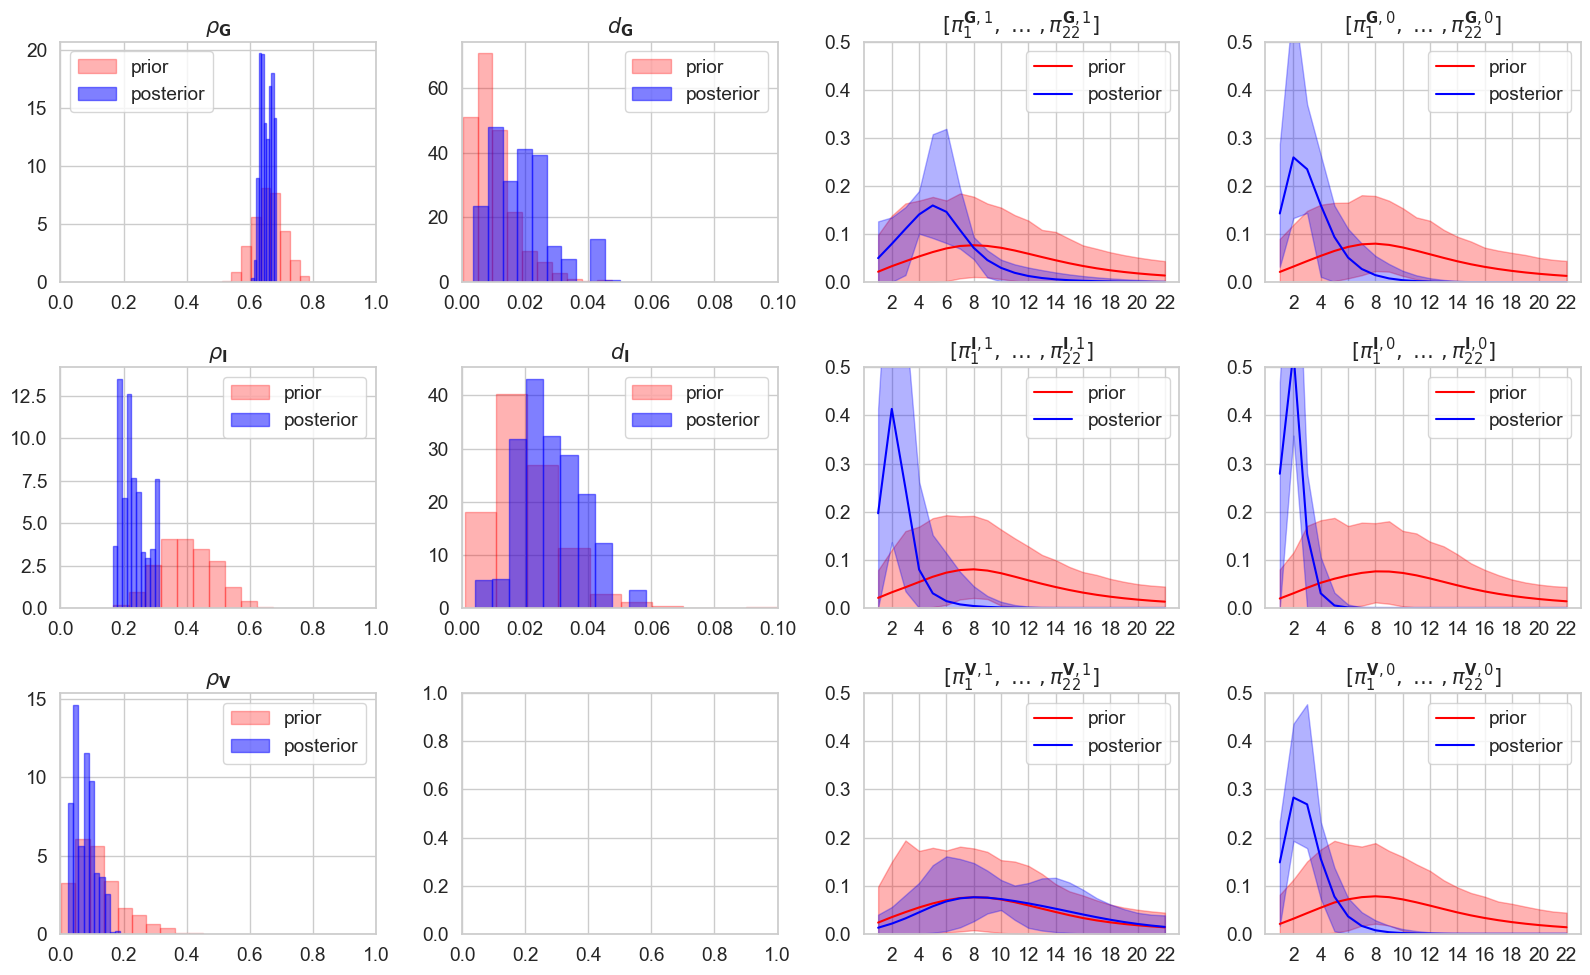

In [16]:
samples_path = 'results/US/MA-20201111-20210111-20210211/PRETRAINED_posterior_samples.json'

## Other default parameters
#
# filename_prior='priors/abc_prior_config_OnCDCTableReasonable.json' --> our prior based on CDC data
# filename_to_save=None --> currently not saving the plot(s)
# filename_true_params=None --> only provided if true parameters are known (used in experiments with synthetic data)
# plot_disjointly=False --> currently plotting the parameters in one big plot, as opposed to each parameter in one plot
#                           If False, then 'filename_to_save' must be a full file path, such as 'MA_parameters.pdf'
#                           If True, then 'filename_to_save' must be just a template, which is then completed by the
#                               code with the parameter name. For example, if specifying 'MA_parameters', the plots are
#                               saved as 'MA_parameters_proba_Recovering_InGeneralWard.pdf', etc.

plot_params(samples_path)

# 2. Run forecast with pretrained posterior

The script `run_forecast` runs a single forecast for every sample from the posterior distribution of ACED-HMM parameters. Each forecast is also run with a different random seed, in increasing order from the provided value of random_seed. The user can specify how many samples to consider; providing 'None' uses all the samples.

If `run_forecast` is provided a single value for each parameter, as opposed to a list of samples, the script runs num_seeds forecasts each with the same, provided parameters. If num_seeds is 'None', only one forecast is made.

Notice the 'approximate' argument; it determines how many patients are modeled 'together' (i.e. with a single trajectory). It reduces granularity in the forecasta, but also the runtime. Try decreasing and increasing it: how does the runtime change? how does the uncertainty change in the plots of step 4?

#### Run this if on Linux / MAC-OS

In [1]:
%%bash
python -m aced_hmm.run_forecast --func_name python \
                                  --config_path results/US/SD-20201111-20210111-20210211/PRETRAINED_config_after_abc.json \
                                  --output_dir results/US/SD-20201111-20210111-20210211/individual_forecasts \
                                  --output_file PRETRAINED_results_after_abc-{{random_seed}}.csv \
                                  --approximate 5 \
                                  --random_seed 1001 \
                                  --num_seeds None 

results/US/SD-20201111-20210111-20210211/PRETRAINED_config_after_abc.json
Forecasting from samples ...
Using 2000 parameter samples, each with a distinct random seed.
--------------------------------------------
           Running 2000 simulations
--------------------------------------------


100%|██████████| 2000/2000 [00:18<00:00, 106.62it/s]


#### Run this if on Windows

In [3]:
%%cmd
python -m aced_hmm.run_forecast --func_name python ^
                                  --config_path results/US/MA-20201111-20210111-20210211/PRETRAINED_config_after_abc.json ^
                                  --output_dir results/US/MA-20201111-20210111-20210211/individual_forecasts ^
                                  --output_file PRETRAINED_results_after_abc-{{random_seed}}.csv ^
                                  --approximate 5 ^
                                  --random_seed 1001 ^
                                  --num_seeds None 

Microsoft Windows [Version 10.0.18363.1440]
(c) 2019 Microsoft Corporation. All rights reserved.

(aced_hmm) C:\Users\giamm\aced_hmm_original_repo\aced-hmm-hospitalized-patient-trajectory-model>python -m aced_hmm.run_forecast --func_name python ^
More?                                   --config_path results/US/MA-20201111-20210111-20210211/PRETRAINED_config_after_abc.json ^
More?                                   --output_dir results/US/MA-20201111-20210111-20210211/individual_forecasts ^
More?                                   --output_file PRETRAINED_results_after_abc-{{random_seed}}.csv ^
More?                                   --approximate 5 ^
More?                                   --random_seed 1001 ^
More?                                   --num_seeds None 
Forecasting from samples ...
Using 2000 parameter samples, each with a distinct random seed.
--------------------------------------------
           Running 2000 simulations
--------------------------------------------

(ace

100%|##########| 2000/2000 [05:25<00:00,  6.14it/s]


# 3. Summarize forecasts

#### Run this if on Linux / MAC-OS

In [2]:
%%bash
python -m aced_hmm.summarize_forecasts --input_dir results/US/SD-20201111-20210111-20210211/individual_forecasts \
                                         --output_dir results/US/SD-20201111-20210111-20210211 \
                                         --output_template PRETRAINED_summary_after_abc_ \
                                         --input_csv_file_pattern PRETRAINED_results_after_abc*.csv \
                                         --comma_sep_percentiles 1,2.5,5,10,25,50,75,90,95,97.5,99

----------------------------------------
Reading in data from 2000 simulations
----------------------------------------


100%|██████████| 2000/2000 [00:00<00:00, 2274.59it/s]


----------------------------------------
Computing summaries for 11 percentiles
----------------------------------------


#### Run this if on Windows

In [4]:
%%cmd
python -m aced_hmm.summarize_forecasts --input_dir results/US/MA-20201111-20210111-20210211/individual_forecasts ^
                                         --output_dir results/US/MA-20201111-20210111-20210211 ^
                                         --output_template PRETRAINED_summary_after_abc_ ^
                                         --input_csv_file_pattern PRETRAINED_results_after_abc*.csv ^
                                         --comma_sep_percentiles 1,2.5,5,10,25,50,75,90,95,97.5,99

Microsoft Windows [Version 10.0.18363.1440]
(c) 2019 Microsoft Corporation. All rights reserved.

(aced_hmm) C:\Users\giamm\aced_hmm_original_repo\aced-hmm-hospitalized-patient-trajectory-model>python -m aced_hmm.summarize_forecasts --input_dir results/US/MA-20201111-20210111-20210211/individual_forecasts ^
More?                                          --output_dir results/US/MA-20201111-20210111-20210211 ^
More?                                          --output_template PRETRAINED_summary_after_abc_ ^
More?                                          --input_csv_file_pattern PRETRAINED_results_after_abc*.csv ^
More?                                          --comma_sep_percentiles 1,2.5,5,10,25,50,75,90,95,97.5,99
----------------------------------------
Reading in data from 2000 simulations
----------------------------------------
----------------------------------------
Computing summaries for 11 percentiles
----------------------------------------

(aced_hmm) C:\Users\giamm\aced_hmm_o

100%|##########| 2000/2000 [00:30<00:00, 65.03it/s]


# 4. Visualize forecasts

We can see good fits to the training counts, as well as accurate forecasts during the test window.

In [3]:
from aced_hmm.visualize_forecasts import plot_forecasts

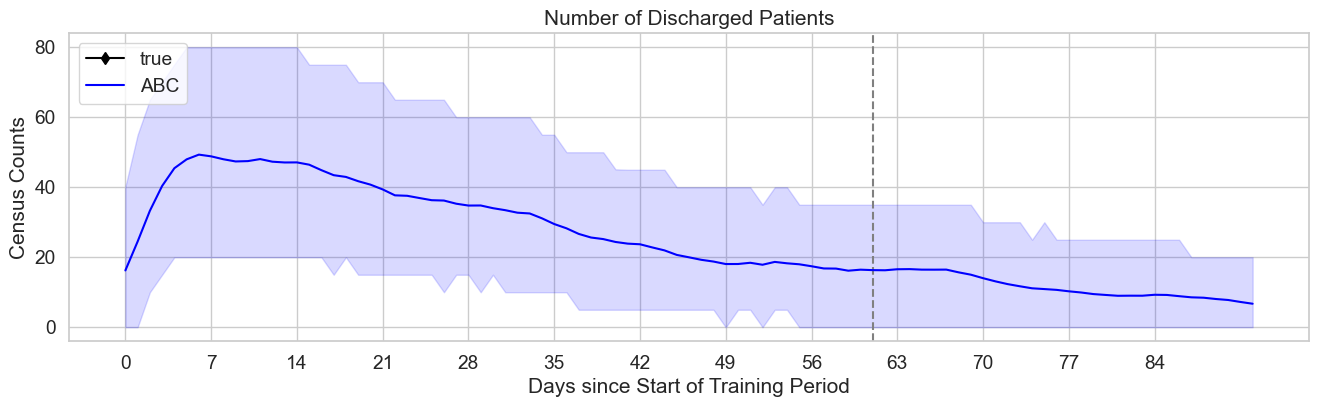

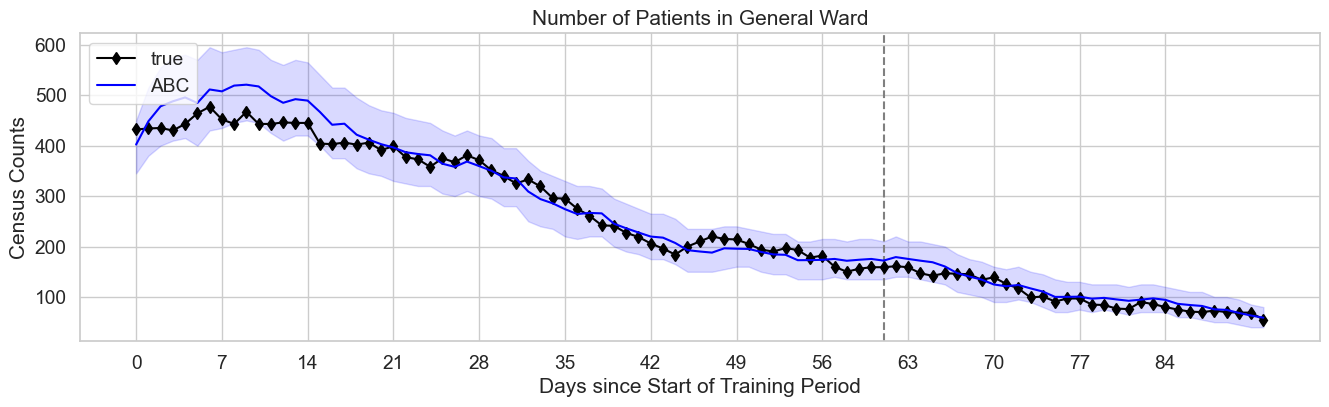

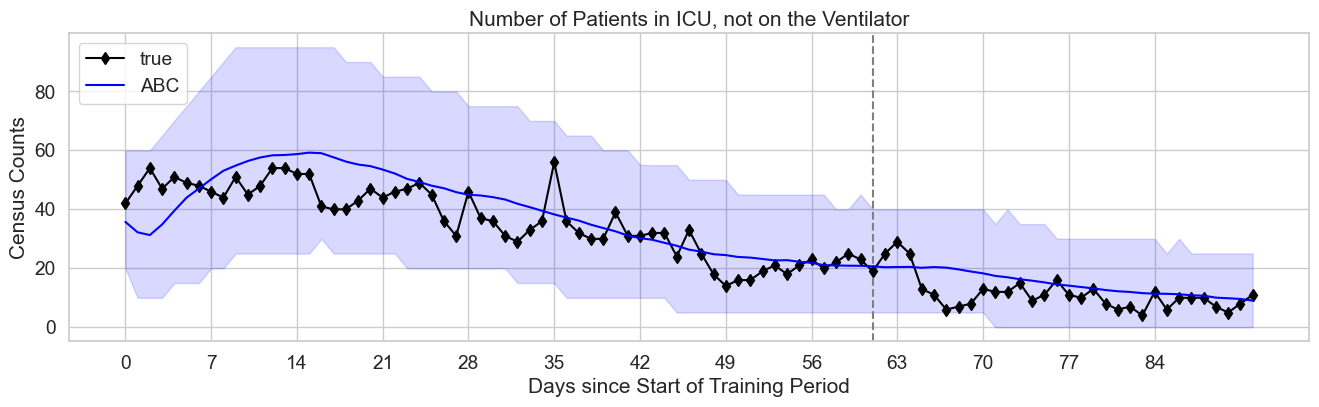

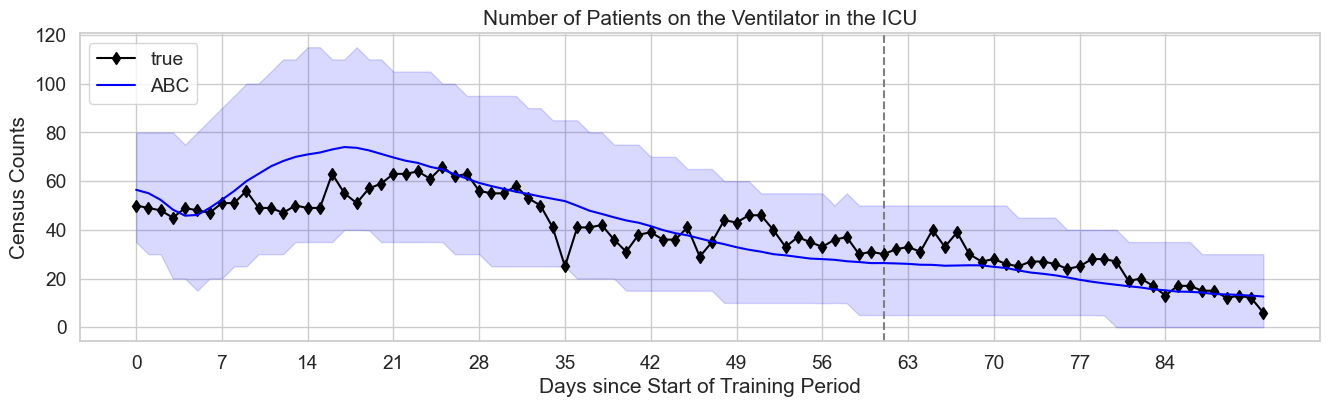

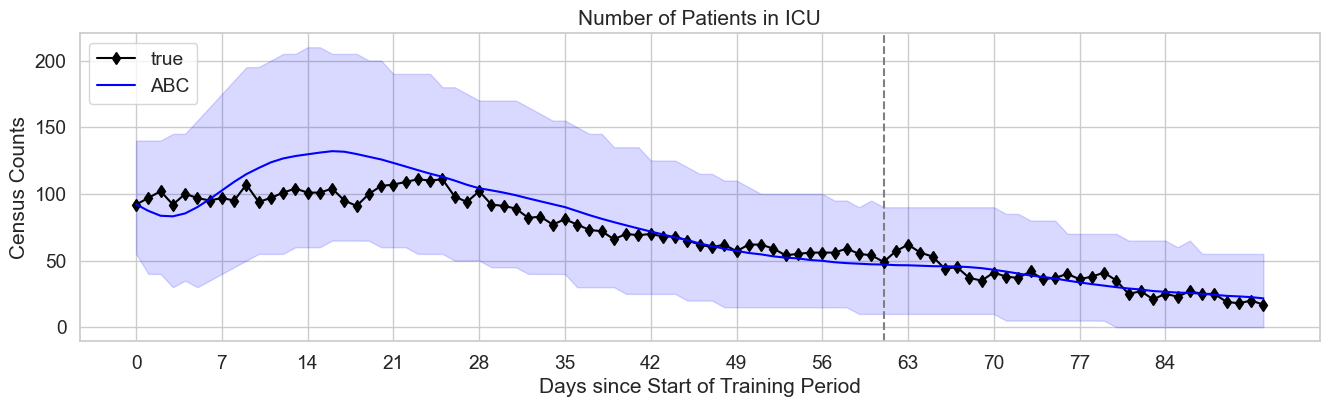

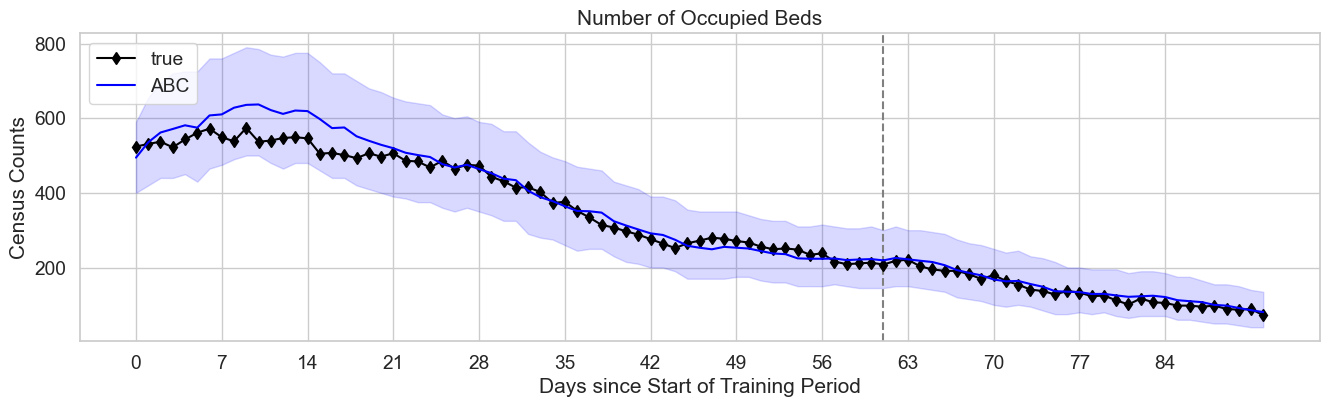

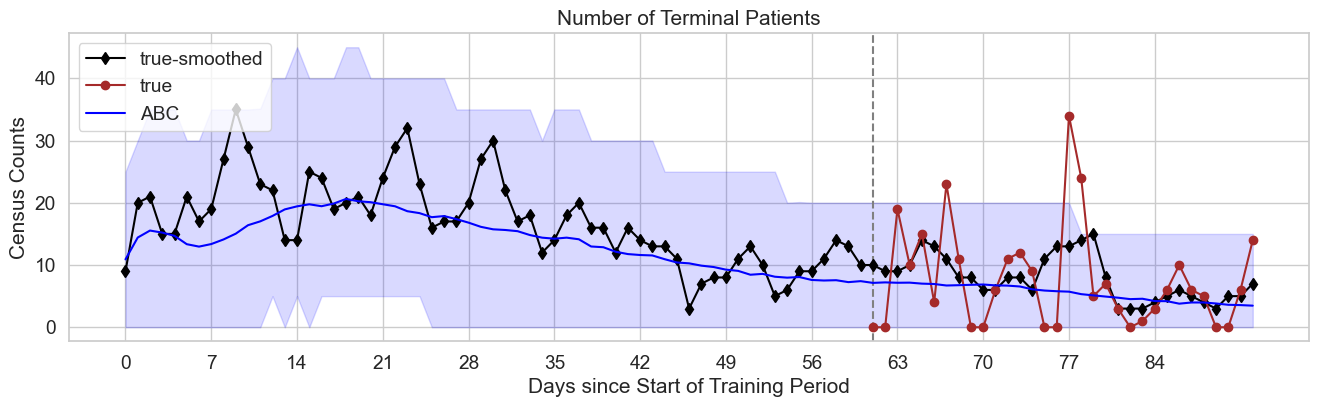

In [4]:
config_path = 'results/US/SD-20201111-20210111-20210211/PRETRAINED_config_after_abc.json'
input_summaries_template_path = 'results/US/SD-20201111-20210111-20210211/PRETRAINED_summary_after_abc'
true_stats = 'datasets/US/SD-20201111-20210111-20210211/daily_counts.csv'

## Other default parameters
#
# figure_template_path=None --> currently not saving the plots. Must provide a template, which the code completes with the 
#                                   count name. For example, specifying 'MA_forecasts' saves the plots with names 
#                                   'MA_forecast_n_InGeneralWard.pdf', etc.
# smooth_terminal_counts=True --> plots smoothed version of true terminal counts (n_TERMINAL_5daysSmoothed)
# expected_columns=['n_discharged_InGeneralWard', 'n_InGeneralWard', 'n_OffVentInICU', 'n_OnVentInICU', 'n_InICU', 'n_occupied_beds', 'n_TERMINAL']
#                  --> counts to plot forecasts for

plot_forecasts(input_summaries_template_path, config_path, true_stats)

In [3]:
import json

with open("./results/US/MA-20201111-20210111-20210211/PRETRAINED_posterior_samples.json", "r") as f:
    posterior_samples = json.load(f)

In [4]:
# Example analysis
for param_name, values in posterior_samples.items():
    if isinstance(values, list):
        print(f"{param_name}: mean={sum(values)/len(values):.4f}, min={min(values):.4f}, max={max(values):.4f}")
    elif isinstance(values, dict):
        for sub_param, sub_values in values.items():
            if isinstance(sub_values, list):
                print(f"{param_name}.{sub_param}: mean={sum(sub_values)/len(sub_values):.4f}, min={min(sub_values):.4f}, max={max(sub_values):.4f}")

proba_Recovering_given_InGeneralWard: mean=0.6516, min=0.6042, max=0.6836
proba_Die_after_Declining_InGeneralWard: mean=0.0188, min=0.0036, max=0.0500
pmf_duration_Recovering_InGeneralWard.1: mean=0.0499, min=0.0000, max=0.1396
pmf_duration_Recovering_InGeneralWard.2: mean=0.0795, min=0.0000, max=0.1470
pmf_duration_Recovering_InGeneralWard.3: mean=0.1105, min=0.0047, max=0.1590
pmf_duration_Recovering_InGeneralWard.4: mean=0.1406, min=0.0805, max=0.2066
pmf_duration_Recovering_InGeneralWard.5: mean=0.1593, min=0.0891, max=0.3941
pmf_duration_Recovering_InGeneralWard.6: mean=0.1461, min=0.0792, max=0.3801
pmf_duration_Recovering_InGeneralWard.7: mean=0.1081, min=0.0676, max=0.2006
pmf_duration_Recovering_InGeneralWard.8: mean=0.0713, min=0.0147, max=0.0998
pmf_duration_Recovering_InGeneralWard.9: mean=0.0458, min=0.0011, max=0.0734
pmf_duration_Recovering_InGeneralWard.10: mean=0.0297, min=0.0000, max=0.0513
pmf_duration_Recovering_InGeneralWard.11: mean=0.0194, min=0.0000, max=0.0375


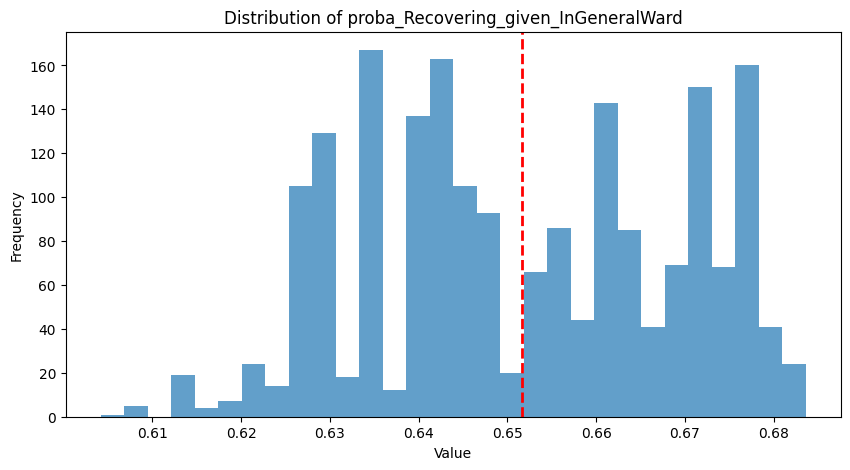

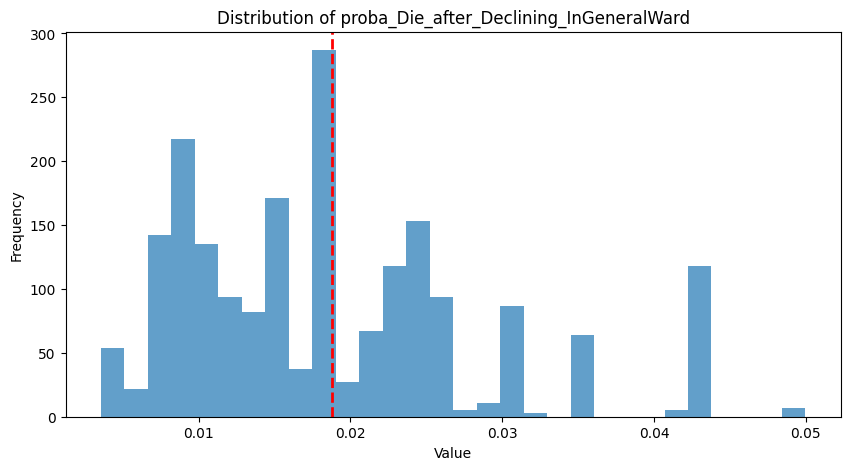

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# For a few key parameters
key_params = ['proba_Recovering_given_InGeneralWard', 'proba_Die_after_Declining_InGeneralWard']
for param in key_params:
    if param in posterior_samples and isinstance(posterior_samples[param], list):
        plt.figure(figsize=(10, 5))
        plt.hist(posterior_samples[param], bins=30, alpha=0.7)
        plt.title(f"Distribution of {param}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.axvline(np.mean(posterior_samples[param]), color='red', linestyle='dashed', linewidth=2)
        plt.show()

In [6]:
# Example: Create a config using mean values
config_dict = {}
for param_name, values in posterior_samples.items():
    if isinstance(values, list):
        config_dict[param_name] = sum(values)/len(values)
    elif isinstance(values, dict):
        config_dict[param_name] = {}
        for sub_param, sub_values in values.items():
            if isinstance(sub_values, list):
                config_dict[param_name][sub_param] = sum(sub_values)/len(sub_values)